In [2]:
import os,sys
Dig_path = r"C:\Program Files\DIgSILENT\PowerFactory 2024 SP5A\Python\3.11"
sys.path.append(Dig_path)
os.environ['PATH']+= ';' +Dig_path

In [3]:
import powerfactory as pf
import matplotlib.pyplot as plt

In [4]:

# Connect to PowerFactory
app = pf.GetApplication()
if not app:
    print("PowerFactory application not found. Ensure it is running.")
    exit()

# Activate the project
project_name = 'Wind Farm'
app.ActivateProject(project_name)

# Confirm the project activation
active_project = app.GetActiveProject()
if active_project and active_project.loc_name == project_name:
    print(f"Project '{project_name}' activated successfully.")
else:
    print(f"Failed to activate project '{project_name}'. Verify the name and availability.")
    exit()

Project 'Wind Farm' activated successfully.


In [5]:
study_case_fldr = app.GetProjectFolder('study')

In [6]:
study_case = study_case_fldr.GetContents('*.Intcase',0)

In [7]:
for case in study_case:
    print(case.loc_name)

3.1 Power Curve
4.1 P-Q Diagram
4.2 P-Q Diagram overload limited
4.3 V-Q Diagram
4.4 V-Q Diagram overload limited
2.1 IEC 60909 Short-Circuit & Protection
2.2 Complete Short-Circuit & Protection
2.3 Complete Short-Circuit & Prot. (G74)
3.2 Basic Energy Analysis
3.3 Probabilistic Energy Analysis
5. Harmonics
6.1 UVRT Simulation 0% Un
6.2 UVRT Simulation 30% Un
6.3 OVRT Simulation 120% Un
6.4 OVRT Simulation 130% Un
7. Park Controller Simulation
1. Base Case


In [12]:
# Activate the 'Base Case' study case
study_case_name = '1. Base Case'
study_case = study_case_fldr.GetContents(f'{study_case_name}*.IntCase', 0)

if study_case:
    study_case = study_case[0]  # Access the first matching study case
    study_case.Activate()
    print(f"Study case '{study_case_name}' activated successfully.")
else:
    print(f"Failed to activate study case '{study_case_name}'.")
    exit()


Study case '1. Base Case' activated successfully.


In [13]:
# Perform the load flow
ldf = app.GetFromStudyCase('ComLdf')  # Get the load flow object from the active study case

if ldf:
    error_code = ldf.Execute()  # Execute the load flow
    if error_code == 0:
        print("Load flow executed successfully.")
    else:
        print(f"Load flow failed with error code: {error_code}")
else:
    print("Load flow object not found in the study case.")


Load flow executed successfully.


In [14]:
# Retrieve all buses
buses = app.GetCalcRelevantObjects('*.ElmTerm')  # ElmTerm represents buses

if buses:
    print("Load Flow Results (Bus Voltages):")
    for bus in buses:
        voltage = bus.GetAttribute('m:u')  # Voltage magnitude in p.u.
        print(f"Bus: {bus.loc_name}, Voltage: {voltage:.3f} p.u.")
else:
    print("No buses found in the network.")


Load Flow Results (Bus Voltages):
Bus: 1, Voltage: 1.000 p.u.
Bus: T1.1, Voltage: 1.000 p.u.
Bus: T1.2, Voltage: 1.000 p.u.
Bus: 2, Voltage: 1.000 p.u.
Bus: T2.1, Voltage: 1.000 p.u.
Bus: T2.2, Voltage: 1.000 p.u.
Bus: 3, Voltage: 1.000 p.u.
Bus: T3.1, Voltage: 1.000 p.u.
Bus: T3.2, Voltage: 1.000 p.u.
Bus: 4, Voltage: 1.000 p.u.
Bus: T4.1, Voltage: 1.000 p.u.
Bus: T4.2, Voltage: 1.000 p.u.
Bus: Busbar PoC, Voltage: 1.000 p.u.
Bus: 1, Voltage: 1.000 p.u.
Bus: T1.1, Voltage: 1.000 p.u.
Bus: T1.2, Voltage: 1.000 p.u.
Bus: 2, Voltage: 1.000 p.u.
Bus: T2.1, Voltage: 1.000 p.u.
Bus: T2.2, Voltage: 1.000 p.u.
Bus: 3, Voltage: 1.000 p.u.
Bus: T3.1, Voltage: 1.000 p.u.
Bus: T3.2, Voltage: 1.000 p.u.
Bus: 4, Voltage: 1.000 p.u.
Bus: T4.1, Voltage: 1.000 p.u.
Bus: T4.2, Voltage: 1.000 p.u.
Bus: Busbar, Voltage: 1.000 p.u.
Bus: LV 1.1, Voltage: 0.971 p.u.
Bus: LV 1.2, Voltage: 0.972 p.u.
Bus: LV 2.1, Voltage: 0.981 p.u.
Bus: LV 2.2, Voltage: 0.985 p.u.
Bus: LV 2.3, Voltage: 0.987 p.u.
Bus: LV 2.4

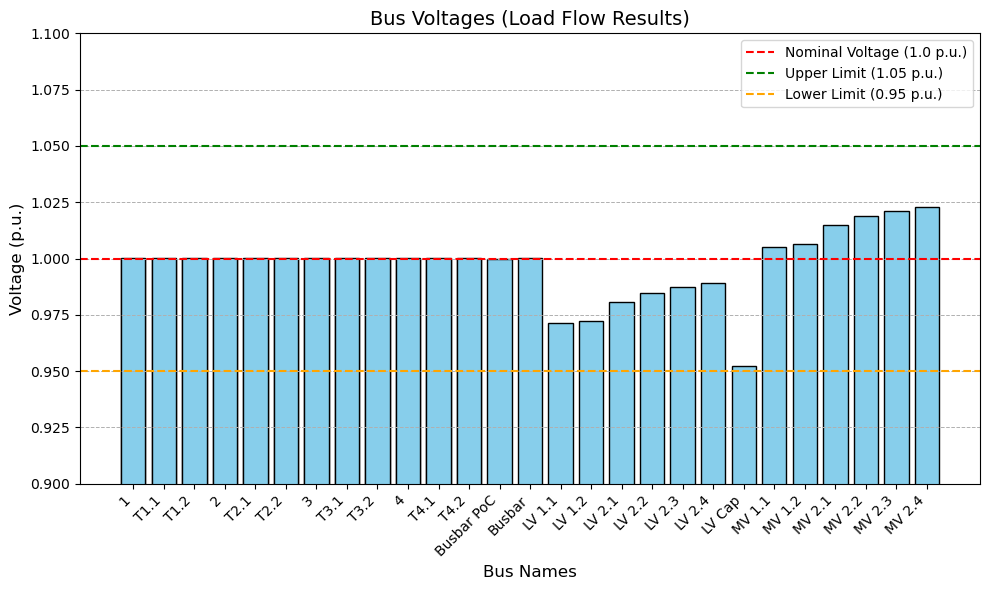

In [15]:
# Retrieve and store bus voltages
buses = app.GetCalcRelevantObjects('*.ElmTerm')  # Get all buses
bus_names = []
bus_voltages = []

if buses:
    for bus in buses:
        bus_names.append(bus.loc_name)  # Store bus name
        bus_voltages.append(bus.GetAttribute('m:u'))  # Store voltage in p.u.
else:
    print("No buses found in the network.")
    exit()

# Plot the bus voltages
plt.figure(figsize=(10, 6))
plt.bar(bus_names, bus_voltages, color='skyblue', edgecolor='black')
plt.axhline(1.0, color='red', linestyle='--', label='Nominal Voltage (1.0 p.u.)')
plt.axhline(1.05, color='green', linestyle='--', label='Upper Limit (1.05 p.u.)')
plt.axhline(0.95, color='orange', linestyle='--', label='Lower Limit (0.95 p.u.)')

# Customize the plot
plt.title('Bus Voltages (Load Flow Results)', fontsize=14)
plt.xlabel('Bus Names', fontsize=12)
plt.ylabel('Voltage (p.u.)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylim(0.9, 1.1)  # Set y-axis range to focus on typical voltage ranges
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


In [16]:
# Activate the short-circuit study case
study_case_name = '2.1 IEC 60909 Short-Circuit & Protection'
study_case = study_case_fldr.GetContents(f'{study_case_name}*.IntCase', 0)

if study_case:
    study_case = study_case[0]
    study_case.Activate()
    print(f"Study case '{study_case_name}' activated successfully.")
else:
    print(f"Failed to activate study case '{study_case_name}'.")
    exit()


Study case '2.1 IEC 60909 Short-Circuit & Protection' activated successfully.


In [17]:
# Perform the short-circuit analysis
short_circuit = app.GetFromStudyCase('ComShc')  # Retrieve the short-circuit object
if short_circuit:
    error_code = short_circuit.Execute()  # Execute the short-circuit study
    if error_code == 0:
        print("Short-circuit analysis executed successfully.")
    else:
        print(f"Short-circuit analysis failed with error code: {error_code}")
else:
    print("Short-circuit calculation object not found.")


Short-circuit analysis executed successfully.


In [20]:
# Retrieve all cubicles connected to buses
cubicles = app.GetCalcRelevantObjects('*.StaCubic')  # Cubicle objects

if cubicles:
    print("Short-Circuit Results (via cubicles):")
    for cubicle in cubicles:
        ikss = cubicle.GetAttribute('m:Ikss')  # Symmetrical short-circuit current (kA)
        ip = cubicle.GetAttribute('m:Ip')      # Peak short-circuit current (kA)
        ik = cubicle.GetAttribute('m:Ik')      # Initial short-circuit current (kA)
        
        if ikss is not None:
            print(f"Cubicle: {cubicle.loc_name}, Ikss: {ikss:.3f} kA, Ik: {ik:.3f} kA, Ip: {ip:.3f} kA")
else:
    print("No cubicles with short-circuit results found.")



Short-Circuit Results (via cubicles):
Cubicle: Cub_1, Ikss: 0.000 kA, Ik: 0.000 kA, Ip: 0.000 kA
Cubicle: Cubicle_S0.0.0, Ikss: 0.000 kA, Ik: 0.000 kA, Ip: 0.000 kA
Cubicle: Cubicle_S0.0.0, Ikss: 0.000 kA, Ik: 0.000 kA, Ip: 0.000 kA
Cubicle: Cubicle_S0.0.1, Ikss: 0.000 kA, Ik: 0.000 kA, Ip: 0.000 kA
Cubicle: Cubicle_S0.0.1, Ikss: 0.000 kA, Ik: 0.000 kA, Ip: 0.000 kA
Cubicle: Cubicle_S0.0.2, Ikss: 0.000 kA, Ik: 0.000 kA, Ip: 0.000 kA
Cubicle: Cub_1, Ikss: 0.000 kA, Ik: 0.000 kA, Ip: 0.000 kA
Cubicle: Cubicle_S0.0.0, Ikss: 0.000 kA, Ik: 0.000 kA, Ip: 0.000 kA
Cubicle: Cubicle_S0.0.0, Ikss: 0.000 kA, Ik: 0.000 kA, Ip: 0.000 kA
Cubicle: Cubicle_S0.0.1, Ikss: 0.000 kA, Ik: 0.000 kA, Ip: 0.000 kA
Cubicle: Cubicle_S0.0.1, Ikss: 0.000 kA, Ik: 0.000 kA, Ip: 0.000 kA
Cubicle: Cubicle_S0.0.2, Ikss: 0.000 kA, Ik: 0.000 kA, Ip: 0.000 kA
Cubicle: Cubicle_S0.0.0, Ikss: 0.000 kA, Ik: 0.000 kA, Ip: 0.000 kA
Cubicle: Cubicle_S0.0.0, Ikss: 0.000 kA, Ik: 0.000 kA, Ip: 0.000 kA
Cubicle: Cubicle_S0.0.1, Iks

In [26]:
# Activate the UVRT study case
study_case_name = '6.1 UVRT Simulation 0% Un'
study_case_fldr = app.GetProjectFolder('study')  # Access the study case folder
study_case = study_case_fldr.GetContents(f'{study_case_name}*.IntCase', 0)

if study_case:
    study_case = study_case[0]
    study_case.Activate()
    print(f"Study case '{study_case_name}' activated successfully.")
else:
    print(f"Failed to activate study case '{study_case_name}'.")
    exit()



Study case '6.1 UVRT Simulation 0% Un' activated successfully.


In [28]:
# Execute the dynamic simulation
simulation = app.GetFromStudyCase('ComSim')  # Get the dynamic simulation object
if simulation:
    error_code = simulation.Execute()  # Run the simulation
    if error_code == 0:
        print("Dynamic simulation executed successfully.")
    else:
        print(f"Dynamic simulation failed with error code: {error_code}")
        exit()
else:
    print("Dynamic simulation object not found in the study case.")
    exit()




Dynamic simulation executed successfully.


In [29]:
# Retrieve voltage results for all buses
buses = app.GetCalcRelevantObjects('*.ElmTerm')  # Get all buses
if buses:
    print("Voltage Results During UVRT:")
    for bus in buses:
        voltage = bus.GetAttribute('m:u')  # Voltage magnitude in p.u.
        print(f"Bus: {bus.loc_name}, Voltage: {voltage:.3f} p.u.")
else:
    print("No buses found in the network.")


Voltage Results During UVRT:
Bus: 1, Voltage: 1.000 p.u.
Bus: T1.1, Voltage: 1.000 p.u.
Bus: T1.2, Voltage: 1.000 p.u.
Bus: 2, Voltage: 1.000 p.u.
Bus: T2.1, Voltage: 1.000 p.u.
Bus: T2.2, Voltage: 1.000 p.u.
Bus: 3, Voltage: 0.000 p.u.
Bus: T3.1, Voltage: 0.000 p.u.
Bus: T3.2, Voltage: 1.000 p.u.
Bus: 4, Voltage: 1.000 p.u.
Bus: T4.1, Voltage: 1.000 p.u.
Bus: T4.2, Voltage: 1.000 p.u.
Bus: Busbar PoC, Voltage: 1.000 p.u.
Bus: 1, Voltage: 1.000 p.u.
Bus: T1.1, Voltage: 1.000 p.u.
Bus: T1.2, Voltage: 1.000 p.u.
Bus: 2, Voltage: 1.000 p.u.
Bus: T2.1, Voltage: 1.000 p.u.
Bus: T2.2, Voltage: 1.000 p.u.
Bus: 3, Voltage: 1.000 p.u.
Bus: T3.1, Voltage: 1.000 p.u.
Bus: T3.2, Voltage: 1.000 p.u.
Bus: 4, Voltage: 1.000 p.u.
Bus: T4.1, Voltage: 1.000 p.u.
Bus: T4.2, Voltage: 1.000 p.u.
Bus: Busbar, Voltage: 1.000 p.u.
Bus: LV 1.1, Voltage: 0.972 p.u.
Bus: LV 1.2, Voltage: 0.974 p.u.
Bus: LV 2.1, Voltage: 0.983 p.u.
Bus: LV 2.2, Voltage: 0.988 p.u.
Bus: LV 2.3, Voltage: 0.991 p.u.
Bus: LV 2.4, Vol

In [31]:
# Execute RMS simulation
simulation = app.GetFromStudyCase('ComSim')  # Get the simulation object
if simulation:
    simulation.SetAttribute('tstop', 1.0)  # Set the simulation stop time to 1 second
    error_code = simulation.Execute()  # Execute the simulation
    if error_code == 0:
        print("RMS simulation executed successfully.")
    else:
        print(f"RMS simulation failed with error code: {error_code}")
        exit()
else:
    print("Simulation object not found.")
    exit()



RMS simulation executed successfully.
